In [1]:
# Import Tensor Flow
import tensorflow as tf

# from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# Import Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Create Path Variable
PATH = 'data/'

# Create Test and Train Path
test_dir = os.path.join(PATH,"test")
train_dir = os.path.join(PATH,"train")

test_dir = test_dir
train_dir = train_dir

In [19]:
#Create Model Parameters
batch_size = 32
epochs = 30
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMG_SHAPE=(200,200,3)

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Generator for our training data
test_image_generator = ImageDataGenerator(rescale= 1/255.0) 

# Generator for our validation data
train_image_generator = ImageDataGenerator(rescale= 1/255.0) 

In [21]:
# Create Test Data Gen
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           #shuffle=True,
                                                           #class_mode='categorical'
                                                    
                                                           )

Found 1886 images belonging to 5 classes.


In [22]:
# Create Train Data Gen
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           shuffle=True,
                                                           #class_mode='categorical'
                                                           )

Found 4394 images belonging to 5 classes.


In [64]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

C:\Users\absen\Anaconda3\envs\pythondata\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [65]:
base_model.trainable = False

In [66]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 201, 201, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 100, 100, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 100, 100, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [61]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
# Create Model
model = Sequential([
    Conv2D(16, 3,  activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='softmax'),
    Dense(5)
])

In [24]:
# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 64)       

In [26]:
history = model.fit_generator(
    train_data_gen,
    epochs=30,
    validation_data=test_data_gen
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 138 steps, validate for 59 steps
Epoch 1/30
137/138 [============================>.] - ETA: 0s - loss: 1.5605 - accuracy: 0.3615

C:\Users\absen\Anaconda3\envs\pythondata\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


138/138 [==============================] - 97s 704ms/step - loss: 1.5607 - accuracy: 0.3612 - val_loss: 1.5407 - val_accuracy: 0.3674
Epoch 2/30
138/138 [==============================] - 99s 718ms/step - loss: 1.5339 - accuracy: 0.3675 - val_loss: 1.5299 - val_accuracy: 0.3674
Epoch 3/30
138/138 [==============================] - 99s 716ms/step - loss: 1.4860 - accuracy: 0.3946 - val_loss: 1.3839 - val_accuracy: 0.5159
Epoch 4/30
138/138 [==============================] - 104s 753ms/step - loss: 1.3588 - accuracy: 0.4841 - val_loss: 1.2954 - val_accuracy: 0.5127
Epoch 5/30
138/138 [==============================] - 115s 835ms/step - loss: 1.2935 - accuracy: 0.4882 - val_loss: 1.2550 - val_accuracy: 0.5191
Epoch 6/30
138/138 [==============================] - 108s 781ms/step - loss: 1.2387 - accuracy: 0.5023 - val_loss: 1.1977 - val_accuracy: 0.5620
Epoch 7/30
138/138 [==============================] - 108s 785ms/step - loss: 1.1813 - accuracy: 0.5608 - val_loss: 1.2115 - val_accuracy:

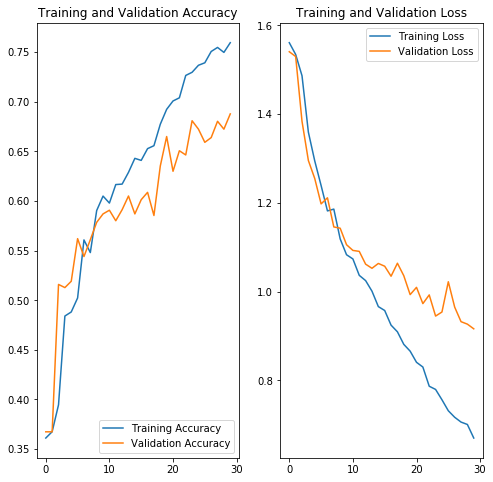

<Figure size 432x288 with 0 Axes>

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('pretrained_vgg19')

In [28]:
model.save('models/tensorflow_model_scratch.h5')